# Introducción a las redes RNN-LSTM 
### Análisis unidimensional de series de tiempo (1 paso)

## Contenido
### 1. Instalando 'yfinance' y usándolo para importar datos del Bitcoin (utilizando Ticker y get_data_yahoo).
### 2. Prueba para importar múltiples datos (opcional).
### 3. Creación y explicación de la función "univariate_data()" para la preparación de datos.

In [ ]:
#Source: https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82#0d57
#Stop Colab from disconecting:
#ctl+shift+i -> console -> command lines:
function KeepClicking(){
console.log("Clicking");
document.querySelector("colab-connect-button").click()
}
setInterval(KeepClicking,60000)

### *Importando paquetes:*

In [3]:
#To import data
!pip install pandas_datareader #For COLAB
import pandas_datareader.data as web
#Data managing
import numpy as np
import os
import pandas as pd
#Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
#RNN
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

#I dont know for what are these packages
import seaborn as sns
import time
import gc
import sys

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

#Setting figure size
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

Tensorflow Version: 2.4.1
Pandas Version: 1.1.5
Numpy Version: 1.19.5
System Version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]




### *Instalando yfinance:*

In [ ]:
#DEL (in my opinion, it's better use this library)
#installing yfinance (Colab)
!pip install yfinance
#pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3MB 13.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=837d6c375c78518e36a61bb69c3b82ab4d74a58c7316642ea7277d30771f0fae
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


### *Importando y visualizando datos del bitcoin:*


In [4]:
#Univariate time series
btc_usd = web.DataReader("BTC-USD", 'yahoo')
#print(type(btc_usd))
btc_usd.head()
#btc_usd.sort_index(ascending=False).head()

#NOTE: Check that index is date by default

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-24,450.298004,446.062012,446.062012,449.598999,65231000.0,449.598999
2016-05-25,453.644012,447.895996,449.671997,453.384003,65203800.0,453.384003
2016-05-26,478.148987,453.520996,453.520996,473.463989,164780992.0,473.463989
2016-05-27,533.473022,472.699005,473.028992,530.039978,181199008.0,530.039978
2016-05-28,553.960022,512.179016,527.476990,526.232971,148736992.0,526.232971


## (Opcional):
La siguiente celda se puede omitir pues solo muestra la aplicación de unos métodos para series de tiempo univariadas (usando Ticker) y como importar series de tiempo multivariadas:

In [ ]:
###NOTE: minimum interval: 1 minute
#------------------------
#Univariate time series
#------------------------
btc_usd_T = yf.Ticker("BTC-USD")
#type(btc_usd)
#Exploring some methods
#btc_usd.info
#btc_usd.actions
#btc_usd.financials
#btc_usd.history(period="max")
#btc_usd.calendar
#### valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#btc_usd.history(period="2d",interval="1m") 

#-------------------------
#Multivariate time series
#-------------------------

#Several time series
starDate="2017-01-01" #year-month-day
endDate="2017-04-30"
data = web.DataReader("BTC-USD ETH-USD", start=starDate, end=endDate)
print(data)
#print(data["Adj Close"])
#print(type(data["Adj Close"]["BTC-USD"]))
#print(data["Adj Close"]["BTC-USD"])
#dataTickers = yf.Tickers('BTC-USD ETH-USD')
#print(dataTickers.tickers["BTC-USD"].info)
#print(dataTickers.tickers["ETH-USD"].history(period="1mo"))

[*********************100%***********************]  2 of 2 completed


## (Opcional):
En caso de presentar problemas importando los datos con 'web.DataReader()' se pueden usar los siguientes métodos:

In [ ]:
#DEL
import yfinance as yf

from pandas_datareader import data as pdr

yf.pdr_override() # <== that's all it takes :-)

#Univariate time series
#One way - get_data_yahoo:
btc_usd = pdr.get_data_yahoo("BTC-USD")
print(type(btc_usd))
btc_usd.head()
#btc_usd.sort_index(ascending=False).head()



[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## Registros diarios (uno por día)
Como se puede ver hay se tienen 2420 registros diarios del Bitcoin (desde el 2014 hasta la fecha):

In [3]:
btc_usd.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1822.000000,1822.000000,1822.000000,1822.000000,1.822000e+03,1822.000000
mean,10181.950133,9591.075708,9900.391754,9919.159832,1.668504e+10,9919.159832
std,12799.482194,11942.450560,12408.299505,12420.532163,2.117508e+10,12420.532163
min,450.298004,446.062012,446.062012,449.598999,3.397780e+07,449.598999
25%,3507.680176,3395.305237,3462.213257,3464.599426,1.689300e+09,3464.599426
50%,7344.426270,7005.125000,7190.384277,7196.886719,7.687134e+09,7196.886719
75%,10317.652588,9759.850830,10132.188477,10136.416504,2.403235e+10,10136.416504
max,64863.097656,62208.964844,63523.753906,63503.457031,3.509679e+11,63503.457031


## Función de preparación de datos (ya estandarizados o normalizados) para análisis univariado (*candidata a exportar*)

In [5]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  ''' 
      dataset: Array containing the whole time series (stadarized or not)
      start_index: index from where data start to analize
      end_index: final index to take data. None is to take all data
      history_size: window size to create sequence (and then used to predict)
      target_size: size of data to predict
  '''
  hist = [] #hist = history
  targets = [] 

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    #window = window of time
    window = range(i-history_size,i) #it balances the start_index = start_index + history_size made above
    #print(window,i)
    #print(window)
    #Reshape hist from (history_size,) to (history_size,1)
    hist.append(np.reshape(dataset[window], (history_size, 1))) #len(dataset[window]) = history_size
    #print(hist)
    targets.append(dataset[i+target_size-1])
  return np.array(hist), np.array(targets)

Mirando como trabaja la función univariate_data haciendo una prueba:

In [ ]:
test = np.arange(0,10)
#print(type(test))
#print(test)
#print(test[range(0,4)]) #equivalent to dataset[window]
#print(np.reshape(test[range(0,4)], (4,1)))
#print(test.shape[])
#x,y = univariate_data(dataset=test, start_index=0, end_index=8, history_size=4,target_size=1)
#print(x)
#print(y)
#a = range(-5,5)

### Seleccionando los datos de la serie de tiempo a analizar

Date
2021-05-21    37536.632812
2021-05-22    34770.582031
2021-05-24    38410.621094
Name: Adj Close, dtype: float64


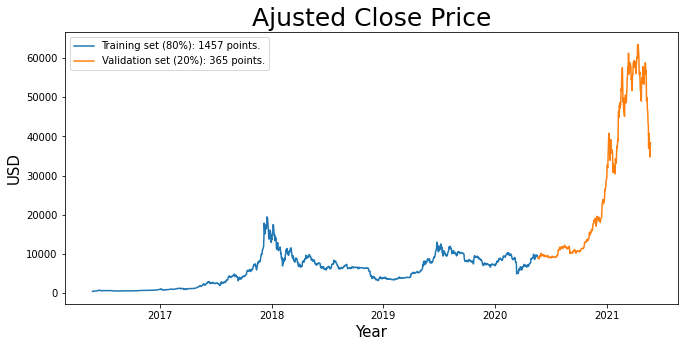

<class 'numpy.ndarray'>


In [8]:
#Extrating data from data frame:
uni_data = btc_usd['Adj Close']
print(uni_data.tail(3))

#-----Indexing (If index is not 'Date'): I THINK IT IS NOT NECCESARY
#print(uni_data.index)
uni_data.index = pd.to_datetime(uni_data.index,format='%Y-%m-%d')
#print(uni_data.index)
#uni_data.index = btc_usd['Date']
#print(uni_data.head())

#Hiperparameter
TRAIN_SPLIT = int(len(btc_usd)*0.8)

#Plotting
plt.figure(figsize=(11,5))
plt.plot(uni_data[:TRAIN_SPLIT], label="Training set (80%): "+str(TRAIN_SPLIT)+" points.")
plt.plot(uni_data[TRAIN_SPLIT:], label="Validation set (20%): "+str(len(btc_usd)-TRAIN_SPLIT)+" points.")
plt.title("Ajusted Close Price", size=25)
plt.xlabel("Year", size=15)
plt.ylabel("USD", size=15)
plt.legend()
plt.show()

#Extracting data as array
uni_data = uni_data.values
print(type(uni_data))

## (Hiper)Parámetros para la red LSTM

In [9]:
#Data load params
BATCH_SIZE = 256
BUFFER_SIZE = 10000
#TRAIN_SPLIT = int(len(btc_usd)*0.8) #Put before
#print(TRAIN_SPLIT)
#print(type(TRAIN_SPLIT))
#print(2424*0.8)

#LSTM params
EVALUATION_INTERVAL = 200 #FOR WHAT?
EPOCHS = 120
PATIENCE = 5 #FOR WHAT?

#Seeding for reproducibility
SEED = 13
tf.random.set_seed(SEED)


## Estandarización (Crear una función *Candidata a exportar*).
Nota: se hace con los datos de entrenamiento.

In [10]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std ()
#print(uni_train_mean)
uni_data = (uni_data - uni_train_mean)/uni_train_std

## Creando los datos (entrenamiento y validación) para la predicción a 1 paso

In [11]:
#Defining history and target size
uni_past_history = 20
uni_future_target = 1 #I DONT KNOW WHY 0 AND NOT 1

#Creating training data
x_train_uni, y_train_uni = univariate_data(dataset = uni_data, start_index = 0, 
                                           end_index = TRAIN_SPLIT, history_size=uni_past_history,
                                           target_size = uni_future_target)

#Creating validation (for prediction) data
x_val_uni, y_val_uni = univariate_data(dataset = uni_data, start_index = TRAIN_SPLIT,
                                       end_index = None, history_size = uni_past_history,
                                       target_size = uni_future_target)

#Checking shape
print(uni_data.shape)
print(x_train_uni.shape)
print(y_train_uni.shape)

(1822,)
(1437, 20, 1)
(1437,)


## Modificando el formato de los datos usando TensorFlow para el uso de RNN-LSTM

In [12]:
#Train data
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#Validation data
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni,y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

print(train_univariate)
print(val_univariate)
print(val_univariate.take(1))

<RepeatDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>
<RepeatDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>
<TakeDataset shapes: ((None, 20, 1), (None,)), types: (tf.float64, tf.float64)>


## Creando los modelos RNN-LSTM (*Crear una función a exportar con el modelo a crear y compilándolo*)

In [17]:
#8 neurons model
U8 = 8
simple_lstm_model_8U = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=U8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)                                                
])
simple_lstm_model_8U.compile(optimizer='adam', loss='mae')

In [14]:
#Checking prediction shape
for x,y in val_univariate.take(1):
  print(simple_lstm_model_8U.predict(x).shape)
  #print(simple_lstm_model.predict(x))

(256, 1)


In [16]:
#128 neurons model
U128 = 128
simple_lstm_model_128U = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=U128, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)                                                
])
simple_lstm_model_128U.compile(optimizer='adam', loss='mae')

In [35]:
#512 neurons model
U1024 = 1024
simple_lstm_model_1024U = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=U1024, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)                                                
])
simple_lstm_model_1024U.compile(optimizer='adam', loss='mae')

## Entrenamiento de la red

In [19]:
%%time
#8 neurons model
#To Stop training when a monitored metric has stopped improving.
#Patience: Number of epochs with no improvement after which training will be stopped.
P = 3
early_stopping = EarlyStopping(monitor='val_loss', patience=P, restore_best_weights=True)
simple_lstm_model_8U.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)
#what steps_per_epoch mean?, what callbacks?, whats validation_step ?

Epoch 1/120
200/200 [==============================] - 3s 6ms/step - loss: 0.3511 - val_loss: 4.3395
Epoch 2/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0895 - val_loss: 3.8648
Epoch 3/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0737 - val_loss: 3.6487
Epoch 4/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0661 - val_loss: 3.5002
Epoch 5/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0611 - val_loss: 3.4099
Epoch 6/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0572 - val_loss: 3.3305
Epoch 7/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0547 - val_loss: 3.2672
Epoch 8/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0526 - val_loss: 3.2353
Epoch 9/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0516 - val_loss: 3.2067
Epoch 10/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0504 - val_lo

In [20]:
%%time
#128 neurons model
simple_lstm_model_128U.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)

Epoch 1/120
200/200 [==============================] - 3s 7ms/step - loss: 0.1974 - val_loss: 2.0047
Epoch 2/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0647 - val_loss: 1.7240
Epoch 3/120
200/200 [==============================] - 1s 5ms/step - loss: 0.0534 - val_loss: 1.6251
Epoch 4/120
200/200 [==============================] - 1s 5ms/step - loss: 0.0505 - val_loss: 1.5734
Epoch 5/120
200/200 [==============================] - 1s 5ms/step - loss: 0.0482 - val_loss: 1.5693
Epoch 6/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0485 - val_loss: 1.6109
Epoch 7/120
200/200 [==============================] - 1s 4ms/step - loss: 0.0476 - val_loss: 1.7051
Epoch 8/120
200/200 [==============================] - 1s 5ms/step - loss: 0.0467 - val_loss: 1.7412
CPU times: user 10 s, sys: 747 ms, total: 10.8 s
Wall time: 8.94 s


In [36]:
%%time
#1024 neurons model 
simple_lstm_model_1024U.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      callbacks=[early_stopping],
                      validation_steps=50)

Epoch 1/120
200/200 [==============================] - 9s 41ms/step - loss: 0.1853 - val_loss: 1.0115
Epoch 2/120
200/200 [==============================] - 8s 40ms/step - loss: 0.0642 - val_loss: 0.8080
Epoch 3/120
200/200 [==============================] - 8s 41ms/step - loss: 0.0530 - val_loss: 1.1282
Epoch 4/120
200/200 [==============================] - 8s 42ms/step - loss: 0.0507 - val_loss: 1.3224
Epoch 5/120
200/200 [==============================] - 8s 41ms/step - loss: 0.0514 - val_loss: 0.8249
CPU times: user 30.1 s, sys: 915 ms, total: 31 s
Wall time: 42.4 s


## Graficando predicciones y función RMSE

In [ ]:
#understanding create_time_steps
#print(list(range(-10,0)))
#---- Enumerate
a = [[[1,2,3,4,5]],[[10]],[[20,30,40]]]
print(a)
#print(type(a))
#print(a[0].flatten()) #error, because a[0] is not a column
#print(enumerate(a))
#enumerate is like a vector of couples like: (index, data)
for i,x in enumerate(a):
  print(i)
  print(x)
  print("end")
#----- numbers, boolean, conditional values and if
print(1==True)
print(0==False)
print(2==False)
if 3:
  print("a")

[[[1, 2, 3, 4, 5]], [[10]], [[20, 30, 40]]]
0
[[1, 2, 3, 4, 5]]
end
1
[[10]]
end
2
[[20, 30, 40]]
end
True
True
False
a


Definiendo funciones (*candidatas a exportar*)

In [22]:
def create_time_steps(length):
  return list(range(-length,0))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

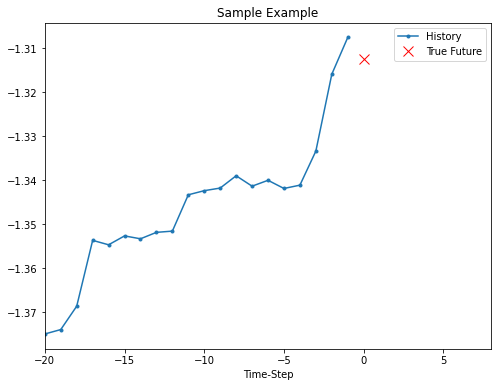

In [23]:
def show_plot(plot_data, delta, title):
  #This function plots 3 things: History, true future and prediction
  '''
      plot_data (list): [x,y,z]: data to plot in function of time (time_steps).
      delta: (0 = False & 1 = True) I think related with 'univariate_future_target' 
      title (str): plot title.
  '''
  #print(type(plot_data))
  #print(plot_data[0])
  #print(plot_data[0].flatten())
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  #print(plot_data[0].shape[0])
  #print(plot_data[0].shape)
  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i,x in enumerate(plot_data): #enumerate(plot_data) = (0,x_train),(1,y_train)
    #Note: i = 0 is false, the rest (i.e. i=300) is true
    if i: #(i = 1)
      plt.plot(future, plot_data[i], marker[i],markersize=10, label=labels[i]) #Plotting true future
    else: #(i=0)
      plt.plot(time_steps,plot_data[i].flatten(),marker[i], label=labels[i]) #Plotting History
    plt.legend()
    plt.xlim([time_steps[0], (future+4)*2])
    plt.xlabel('Time-Step')
  
  return plt

#Testing function
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

### 2 gráficas de una predicción

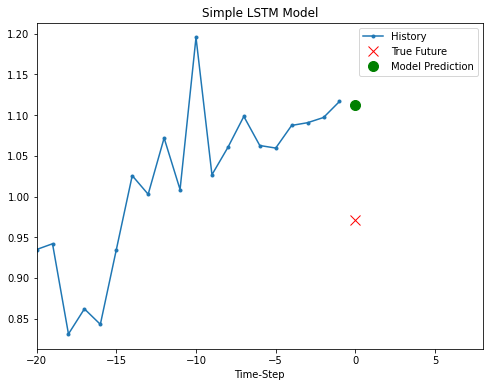

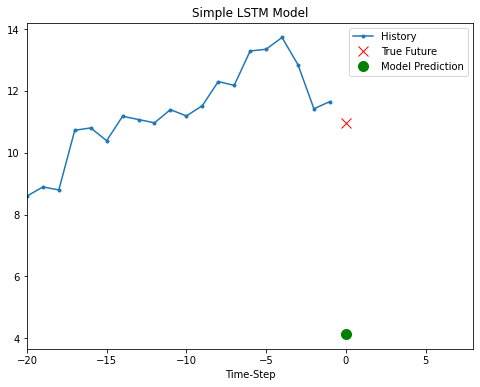

In [24]:
#print(val_univariate.take(1))
#val_univariate.take(k) is like a vector of k first components containing (x_val,y_val) 
for x,y in val_univariate.take(2):
  plot = show_plot(plot_data=[x[0].numpy(),y[0].numpy(),simple_lstm_model_8U.predict(x)[0]], delta=0, title='Simple LSTM Model')
  plot.show()

### Función RMSE: para medir que tan buena es la predicción y comparar los resultados de distintos modelos

### Gráfica comparativa

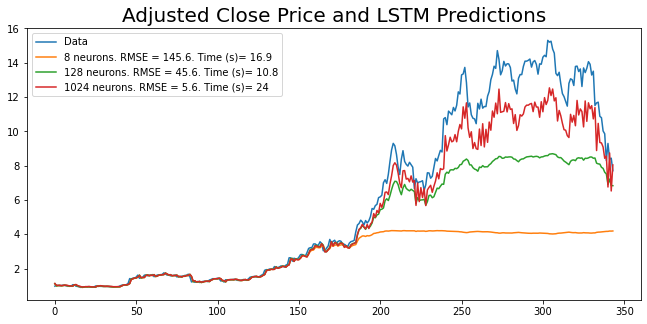

In [37]:
#x_val_uni, y_val_unifor x,y in val_univariate.take(2):
predictions8U = simple_lstm_model_8U.predict(x_val_uni)
predictions128U = simple_lstm_model_128U.predict(x_val_uni)
predictions512U = simple_lstm_model_1024U.predict(x_val_uni)
#plot = show_plot(plot_data=[x[0].numpy(),y[0].numpy(),simple_lstm_model.predict(x)[0]], delta=0, title='Simple LSTM Model')
#plot.show()


RMSE_8U = 145.6
RMSE_128U = 45.6
RMSE_512U = 5.6
T_8U = 16.9
T_128U = 10.8
T_512U = 24


plt.figure(figsize=(11,5))
plt.plot(y_val_uni, label="Data")
plt.plot(predictions8U, label=str(U8)+" neurons. RMSE = "+str(RMSE_8U)+". Time (s)= "+str(T_8U))
plt.plot(predictions128U, label=str(U128)+" neurons. RMSE = "+str(RMSE_128U)+". Time (s)= "+str(T_128U))
plt.plot(predictions512U, label=str(U1024)+" neurons. RMSE = "+str(RMSE_512U)+". Time (s)= "+str(T_512U))
plt.title("Adjusted Close Price and LSTM Predictions", size=20)
plt.legend()
plt.show()
# BEst prediction with 512 neurons
#Include the rms (and place # of neurons and time of training, and GPU)
#NOTE: Destadarization NOT DONE

In [ ]:
#Understanding batches and univariate data in tensorflow format (MOVE THIS CELL)
#TRAIN_SPLIT = int(len(btc_usd)*0.8)
VAL_SPLIT = len(btc_usd) - TRAIN_SPLIT
print(TRAIN_SPLIT,VAL_SPLIT,89+256+20)
#print(type(VAL_SPLIT))
for x,y in val_univariate.take(2): #x and y are the 2 batches of data
  print(len(x))
  #print(x)
  print(x[0])
  print(x[1])
  print("YYYYYYYYY")
  print(y)

1456 365 365
256
tf.Tensor(
[[0.90879959]
 [0.93546359]
 [0.94252793]
 [0.83173084]
 [0.86256072]
 [0.84354917]
 [0.93505111]
 [1.02622736]
 [1.00331597]
 [1.07242284]
 [1.0091173 ]
 [1.19589809]
 [1.02729924]
 [1.0608659 ]
 [1.09893007]
 [1.06319743]
 [1.06006238]
 [1.08787885]
 [1.09122105]
 [1.09762444]], shape=(20, 1), dtype=float64)
tf.Tensor(
[[0.93546359]
 [0.94252793]
 [0.83173084]
 [0.86256072]
 [0.84354917]
 [0.93505111]
 [1.02622736]
 [1.00331597]
 [1.07242284]
 [1.0091173 ]
 [1.19589809]
 [1.02729924]
 [1.0608659 ]
 [1.09893007]
 [1.06319743]
 [1.06006238]
 [1.08787885]
 [1.09122105]
 [1.09762444]
 [1.11730055]], shape=(20, 1), dtype=float64)
YYYYYYYYY
tf.Tensor(
[ 1.09762444  1.11730055  0.97228076  1.01435015  1.01287793  0.98947399
  1.0063782   1.02947348  1.0141944   0.99610002  0.96335109  0.97507359
  0.96748003  1.05875003  1.05370909  0.9701197   0.95721373  0.93026407
  0.89918004  0.92515003  0.93765281  0.92367187  0.94756319  0.91981491
  0.91026535  0.92221592

Seleccionando las características (features): NO ANALIZADO AÚN

                  Open        High   Adj Close
Date                                          
2016-05-23  444.290985  447.100006  445.980988
2016-05-24  446.062012  450.298004  449.598999
2016-05-25  449.671997  453.644012  453.384003
2016-05-26  453.520996  478.148987  473.463989
2016-05-27  473.028992  533.473022  530.039978
DatetimeIndex(['2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26',
               '2016-05-27', '2016-05-28', '2016-05-29', '2016-05-30',
               '2016-05-31', '2016-06-01',
               ...
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-23'],
              dtype='datetime64[ns]', name='Date', length=1822, freq=None)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a23bfcc10>,
      dtype=object)

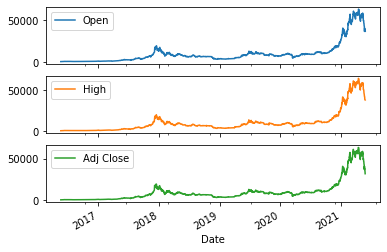

In [ ]:
#Selecting features:
features_considered = ['Open', 'High', 'Adj Close']
features = btc_usd[features_considered]
#print(type(features))
print(features.head())
print(features.index)

#-----If index is not 'Date':
#features.index = btc_usd['Date']
#print(features.head())

#Plotting
features.plot(subplots=True)

<class 'numpy.ndarray'>
[[  465.86401367   468.17401123   457.33401489]
 [  456.85998535   456.85998535   424.44000244]
 [  424.10299683   427.83499146   394.79598999]
 ...
 [58877.390625   59210.8828125  58232.31640625]
 [58250.87109375 59519.35546875 55859.796875  ]
 [55665.359375   56385.7265625  55909.1640625 ]]


TypeError: ignored

ddd

In [ ]:
dataset =

Standarized

## Cosas pendientes:
1. Uso de redes LSTM (unidimensional) para hacer predicción 1 paso y multipaso.
2. Detección de series correlacionadas.
3. Analizar otras series (S&P500, JPMorgan, Gold, Apple, etc.)
4. Uso de redes LSTM (multidimensional) para hacer predicción 1 paso y multipaso.

## Bibliografía

### Redes RNN-LSTM (cuaderno).
1. [Introducción a Keras LSTM para series de tiempo multivariadas. Montenegro et.al.](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%205-%20Redes%20recurrentes/Cuadernos/rnrTimes_series_Multivariate.ipynb).
1. A. [Notebook community: Time series forecasting (Ori. English)](https://notebook.community/tensorflow/docs-l10n/site/en-snapshot/tutorials/structured_data/time_series).
1. B. [Keras Timeseries Multi-Step Multi-Output](https://www.kaggle.com/nicapotato/keras-timeseries-multi-step-multi-output).

### Yahoo Finance (datos importados).
2. [Yahoo Finance API – A Complete Guide](https://algotrading101.com/learn/yahoo-finance-api-guide/)
3. [yfinance Library – A Complete Guide](https://algotrading101.com/learn/yfinance-guide/)
4. [yfinance documentation](https://pypi.org/project/yfinance/)

### Cuadernos de referencia.
5. [Predicción de acciones usando análisis multivariado (repo)
](https://github.com/ninja3697/Stocks-Price-Prediction-using-Multivariate-Analysis). 
6. [Serie de tiempo multivariadas para predicción de precios en Python](https://www.relataly.com/stock-market-prediction-with-multivariate-time-series-in-python/1815/). 
7. [Conversión de datos (clima)](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/).
8. [Predicción en series de tiempo multivariadas (clima)](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/).
### Libro
9. [François Chollet - Deep Learning with Python](https://b-ok.lat/s/Deep%20Learning%20with%20Python%20Fran%C3%A7ois%20Chollet).
### Artículo
10. [Stock Price Prediction Using CONVOLUTIONAL Neural Networks on a Multivariate Timeseries. Article](https://www.researchgate.net/publication/338477393_Stock_Price_Prediction_Using_Convolutional_Neural_Networks_on_a_Multivariate_Timeseries). 
[]().


##Links sobre criptomonedas (bitcoin especialmente)
https://unperiodico.unal.edu.co/pages/detail/criptomonedas-una-herramienta-riesgosa-pero-de-uso-inminente/

https://repositorio.udesa.edu.ar/jspui/bitstream/10908/16022/1/%5BP%5D%5BW%5D%20T.%20M.%20AyPP.%20Lojo%20M%C3%A1rquez%2C%20Tamara%20In%C3%A9s.pdf  (cap2 c, cap3 ii, cap4)

https://www.daviescoin.io/es/blog/que-determina-el-valor-de-las-criptomonedas

https://www.tekcrispy.com/2018/05/16/que-determina-precio-criptomonedas/

https://repositorio.uniagustiniana.edu.co/bitstream/handle/123456789/845/HurtadoCuellar-AngieDaniela-2019.pdf.pdf?sequence=1 (cap7)
